# Day 15: Chiton

You've almost reached the exit of the cave, but the walls are getting closer together. Your submarine can barely still fit, though; the main problem is that the walls of the cave are covered in [chitons](https://en.wikipedia.org/wiki/Chiton), and it would be best not to bump any of them.

The cavern is large, but has a very low ceiling, restricting your motion to two dimensions. The shape of the cavern resembles a square; a quick scan of chiton density produces a map of **risk level** throughout the cave (your puzzle input). For example:

```
1163751742
1381373672
2136511328
3694931569
7463417111
1319128137
1359912421
3125421639
1293138521
2311944581
```

You start in the top left position, your destination is the bottom right position, and you cannot move diagonally. The number at each position is its **risk level**; to determine the total risk of an entire path, add up the risk levels of each position you **enter** (that is, don't count the risk level of your starting position unless you enter it; leaving it adds no risk to your total).

Your goal is to find a path with the **lowest total risk**. In this example, a path with the lowest total risk is highlighted here:

> *I removed the image for formatting reasons...*

The total risk of this path is **`40`** (the starting position is never entered, so its risk is not counted).

## Part 1

**What is the lowest total risk of any path from the top left to the bottom right?**

In [6]:
with open('./input15.txt') as input_file:
    points = {(x, y): [int(risk_level), float('inf'), None] for y, line in enumerate(input_file.readlines()) for x, risk_level in enumerate(line.strip())}

def get_neighbours(x, y):
    return filter(lambda point: point in points, [(x-1, y), (x+1, y), (x, y-1), (x, y+1)])

points[0, 0] = (points[0, 0][0], 0, None)
target = (max(x for x, _ in points), max(y for _, y in points))

wait_list = [(0, 0)]
completed_points = []

while target not in completed_points:
    current_point = wait_list.pop(0)

    for neighbour in get_neighbours(*current_point):
        if neighbour not in completed_points:
            new_cost = points[current_point][1] + points[neighbour][0]

            if points[neighbour][1] > new_cost:
                points[neighbour][1] = new_cost
                points[neighbour][2] = current_point

            if neighbour not in wait_list:
                wait_list.append(neighbour)

    completed_points.append(current_point)

print(f'Lowest Risk Level: {points[target][1]}')

Lowest Risk Level: 435


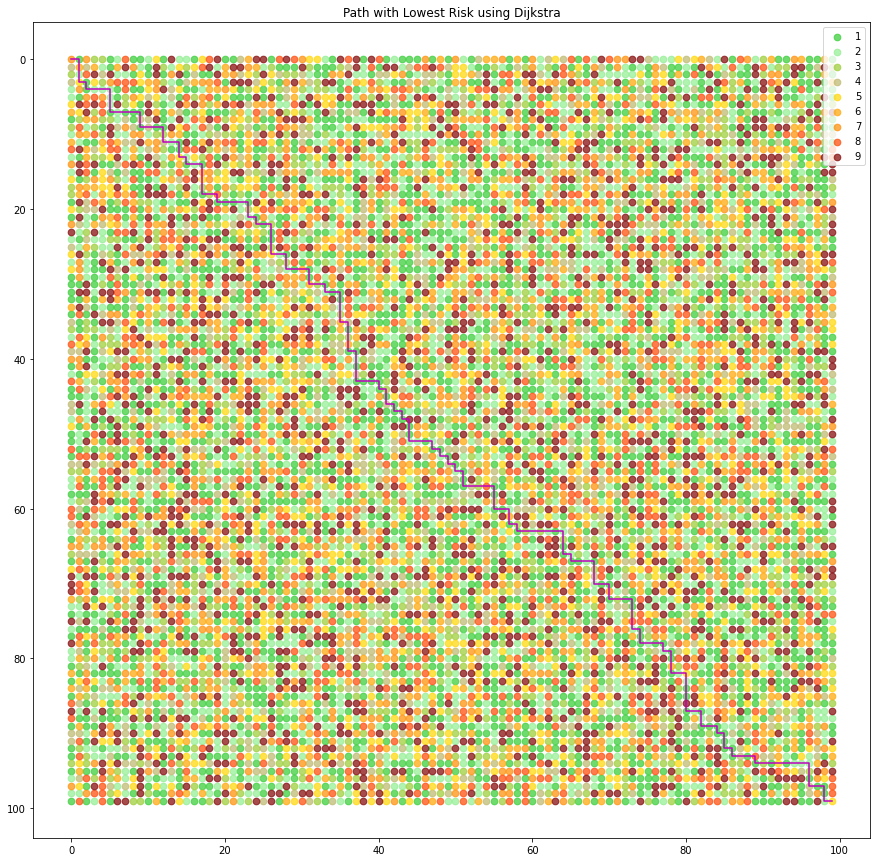

In [30]:
# the visualization

import matplotlib.pyplot as plt
import numpy as np

colors = {1: 'limegreen', 2: 'lightgreen', 3: 'yellowgreen', 4: 'darkkhaki', 5: 'gold', 6: 'orange', 7: 'darkorange', 8: 'orangered', 9: 'maroon'}
x = np.array([point[0] for point in points])
y = np.array([point[1] for point in points])
x_path = []
y_path = []

pre_point = target
while pre_point != None:
    x_path.append(pre_point[0])
    y_path.append(pre_point[1])
    pre_point = points[pre_point][2]

plt.figure(figsize=(15, 15))
plt.gca().invert_yaxis()

risk_levels =[points[point][0] for point in points]
for level in np.unique(risk_levels):
    idx = np.where(risk_levels == level)
    plt.scatter(x[idx], y[idx], c = colors[level], label = level, s = 45, alpha=0.7)

if pre_point != target:
    plt.plot(x_path, y_path, 'm')

plt.title('Path with Lowest Risk using Dijkstra')
plt.legend()
plt.show()

## Part 2

Now that you know how to find low-risk paths in the cave, you can try to find your way out.

The entire cave is actually **five times larger in both dimensions** than you thought; the area you originally scanned is just one tile in a 5x5 tile area that forms the full map. Your original map tile repeats to the right and downward; each time the tile repeats to the right or downward, all of its risk levels **are 1 higher** than the tile immediately up or left of it. However, risk levels above `9` wrap back around to `1`. So, if your original map had some position with a risk level of `8`, then that same position on each of the 25 total tiles would be as follows:

```
8 9 1 2 3
9 1 2 3 4
1 2 3 4 5
2 3 4 5 6
3 4 5 6 7
```

Each single digit above corresponds to the example position with a value of `8` on the top-left tile. Because the full map is actually five times larger in both dimensions, that position appears a total of 25 times, once in each duplicated tile, with the values shown above.

Here is the full five-times-as-large version of the first example above, with the original map in the top left corner highlighted:

```
11637517422274862853338597396444961841755517295286
13813736722492484783351359589446246169155735727126
21365113283247622439435873354154698446526571955763
36949315694715142671582625378269373648937148475914
74634171118574528222968563933317967414442817852555
13191281372421239248353234135946434524615754563572
13599124212461123532357223464346833457545794456865
31254216394236532741534764385264587549637569865174
12931385212314249632342535174345364628545647573965
23119445813422155692453326671356443778246755488935
22748628533385973964449618417555172952866628316397
24924847833513595894462461691557357271266846838237
32476224394358733541546984465265719557637682166874
47151426715826253782693736489371484759148259586125
85745282229685639333179674144428178525553928963666
24212392483532341359464345246157545635726865674683
24611235323572234643468334575457944568656815567976
42365327415347643852645875496375698651748671976285
23142496323425351743453646285456475739656758684176
34221556924533266713564437782467554889357866599146
33859739644496184175551729528666283163977739427418
35135958944624616915573572712668468382377957949348
43587335415469844652657195576376821668748793277985
58262537826937364893714847591482595861259361697236
96856393331796741444281785255539289636664139174777
35323413594643452461575456357268656746837976785794
35722346434683345754579445686568155679767926678187
53476438526458754963756986517486719762859782187396
34253517434536462854564757396567586841767869795287
45332667135644377824675548893578665991468977611257
44961841755517295286662831639777394274188841538529
46246169155735727126684683823779579493488168151459
54698446526571955763768216687487932779859814388196
69373648937148475914825958612593616972361472718347
17967414442817852555392896366641391747775241285888
46434524615754563572686567468379767857948187896815
46833457545794456865681556797679266781878137789298
64587549637569865174867197628597821873961893298417
45364628545647573965675868417678697952878971816398
56443778246755488935786659914689776112579188722368
55172952866628316397773942741888415385299952649631
57357271266846838237795794934881681514599279262561
65719557637682166874879327798598143881961925499217
71484759148259586125936169723614727183472583829458
28178525553928963666413917477752412858886352396999
57545635726865674683797678579481878968159298917926
57944568656815567976792667818781377892989248891319
75698651748671976285978218739618932984172914319528
56475739656758684176786979528789718163989182927419
67554889357866599146897761125791887223681299833479
```

Equipped with the full map, you can now find a path from the top left corner to the bottom right corner with the lowest total risk:

>*I removed the image for formatting reasons...*

The total risk of this path is **`315`** (the starting position is still never entered, so its risk is not counted).

Using the full map, **what is the lowest total risk of any path from the top left to the bottom right?**

In [5]:
from queue import PriorityQueue, Queue


with open('./input15.txt') as input_file:
    points = dict()
    for y, line in enumerate(input_file.readlines()):
        for x, risk_level in enumerate(line.strip()):
            for i in range(5):
                for j in range(5):
                    points[(x + (100 * i), y + (100 * j))] = [(int(risk_level) - 1 + i + j) % 9 + 1, float('inf'), None]

def get_neighbours(x, y):
    return filter(lambda point: point in points, [(x-1, y), (x+1, y), (x, y-1), (x, y+1)])

points[0, 0] = (points[0, 0][0], 0, None)
target = (max(x for x, _ in points), max(y for _, y in points))

wait_list: Queue[tuple[int, int]] = PriorityQueue()
wait_list.put((0, (0, 0)))
completed_points = []

while target not in completed_points:
    current_point = wait_list.get()[1]

    for neighbour in get_neighbours(*current_point):
        if neighbour not in completed_points:
            new_cost = points[current_point][1] + points[neighbour][0]

            if points[neighbour][1] > new_cost:
                points[neighbour][1] = new_cost
                points[neighbour][2] = current_point

            # if neighbour not in wait_list:
                wait_list.put((points[neighbour][1], neighbour))

    completed_points.append(current_point)

print(f'Lowest Risk Level: {points[target][1]}')

Lowest Risk Level: 2842


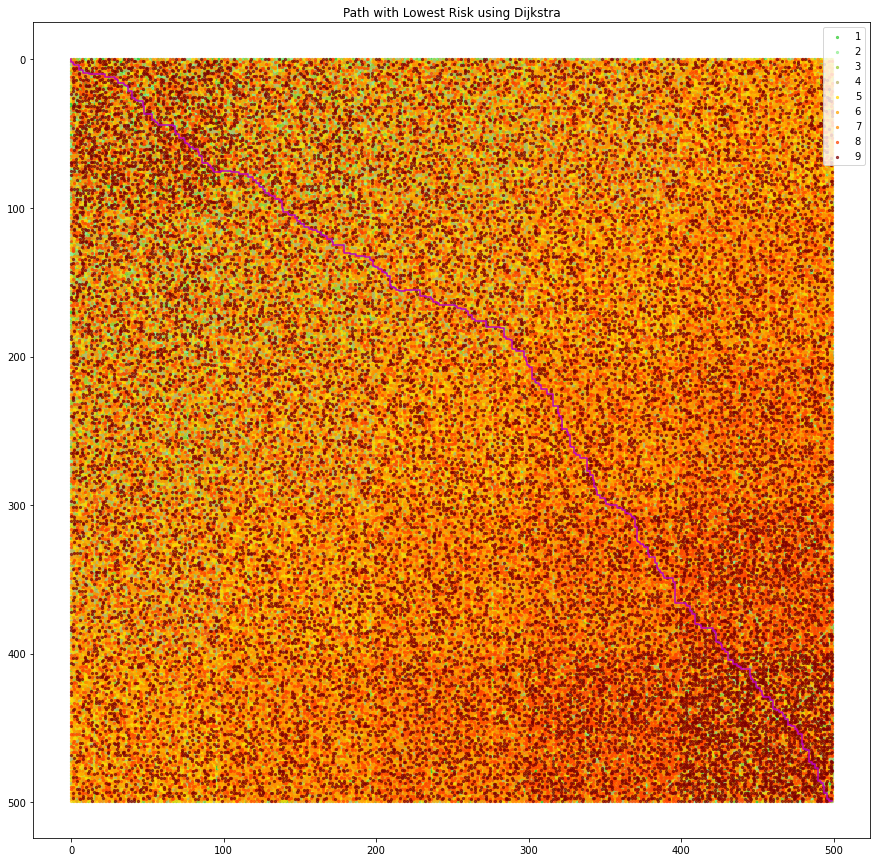

In [6]:
# the visualization

import matplotlib.pyplot as plt
import numpy as np

colors = {1: 'limegreen', 2: 'lightgreen', 3: 'yellowgreen', 4: 'darkkhaki', 5: 'gold', 6: 'orange', 7: 'darkorange', 8: 'orangered', 9: 'maroon'}
x = np.array([point[0] for point in points])
y = np.array([point[1] for point in points])
x_path = []
y_path = []

pre_point = target
while pre_point != None:
    x_path.append(pre_point[0])
    y_path.append(pre_point[1])
    pre_point = points[pre_point][2]

plt.figure(figsize=(15, 15))
plt.gca().invert_yaxis()

risk_levels =[points[point][0] for point in points]
for level in np.unique(risk_levels):
    idx = np.where(risk_levels == level)
    plt.scatter(x[idx], y[idx], c = colors[level], label = level, s = 5, alpha=0.7)

if pre_point != target:
    plt.plot(x_path, y_path, 'm')

plt.title('Path with Lowest Risk using Dijkstra')
plt.legend()
plt.show()